<a href="https://colab.research.google.com/github/vpapadiotis/ml-approach-for-2019-chl-final/blob/main/liverpool_2019_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages

In [1]:
!pip install statsbombpy==1.6.1 --quiet
!pip install mplsoccer==1.1.10 --quiet
!pip install kloppy==3.7.1 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.3/209.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 630.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 2.6 MB/s eta 0:00:00


In [2]:
%config InlineBackend.figure_format = 'retina'

## Import libraries

In [3]:
from statsbombpy import sb
import mplsoccer as mpl
from kloppy import metrica

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from tqdm import tqdm

## Colors Setup

In [6]:
from matplotlib.colors import ListedColormap, to_hex
def bulid_cmap(x, y):
    r,g,b = x
    r_, g_, b_ = y
    N = 256
    A = np.ones((N, 4))
    A[:, 0] = np.linspace(r, 1, N)
    A[:, 1] = np.linspace(g, 1, N)
    A[:, 2] = np.linspace(b, 1, N)
    cmp = ListedColormap(A)

    B = np.ones((N, 4))
    B[:, 0] = np.linspace(r_, 1, N)
    B[:, 1] = np.linspace(g_, 1, N)
    B[:, 2] = np.linspace(b_, 1, N)
    cmp_ = ListedColormap(B)

    newcolors = np.vstack((cmp(np.linspace(0, 1, 128)),
                            cmp_(np.linspace(1, 0, 128))))
    return ListedColormap(newcolors)

In [7]:
blue, red = (44,123,182), (215,25,28)
blue = [x/256 for x in blue]
red = [x/256 for x in red]
diverging = bulid_cmap(blue, red)
diverging_r = bulid_cmap(red, blue)

### Data  Preparation

In [8]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [9]:
matches = sb.matches(competition_id=16, season_id=4)

In [11]:
matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,22912,2019-06-01,21:00:00.000,Europe - Champions League,2018/2019,Tottenham Hotspur,Liverpool,0,2,available,...,2021-06-13T16:17:31.694,13,Final,\tEstádio Cívitas Metropolitano,Damir Skomina,Mauricio Roberto Pochettino Trossero,Jürgen Klopp,1.1.0,2,2


In [15]:
final = matches
final

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,22912,2019-06-01,21:00:00.000,Europe - Champions League,2018/2019,Tottenham Hotspur,Liverpool,0,2,available,...,2021-06-13T16:17:31.694,13,Final,\tEstádio Cívitas Metropolitano,Damir Skomina,Mauricio Roberto Pochettino Trossero,Jürgen Klopp,1.1.0,2,2


In [16]:
match_id = 22912

In [17]:
events = sb.events(match_id = match_id)

In [34]:
# Get all unique player names
unique_players = events['player'].unique()

# Display the unique player names
print(unique_players)

[nan 'Jordan Brian Henderson' 'Joël Andre Job Matip' 'Kieran Trippier'
 'Fábio Henrique Tavares' 'Moussa Sissoko' 'Toby Alderweireld'
 'Virgil van Dijk' 'Georginio Wijnaldum' 'Sadio Mané' 'Harry Kane'
 'Bamidele Alli' 'Christian Dannemann Eriksen' 'Andrew Robertson'
 'Jan Vertonghen' 'Harry Winks' 'Trent Alexander-Arnold' 'Danny Rose'
 'Heung-Min Son' 'Hugo Lloris' 'Mohamed Salah' 'Alisson Ramsés Becker'
 'Roberto Firmino Barbosa de Oliveira' 'James Philip Milner'
 'Divock Okoth Origi' 'Lucas Rodrigues Moura da Silva' 'Eric Dier'
 'Fernando Llorente Torres' 'Joe Gomez']


### VVD Passing Chart

In [35]:
passes = events[(events['type'] == "Pass") &
                (events['player'] == 'Virgil van Dijk')]

In [36]:
coordinates = passes[['location', 'pass_end_location']]

In [37]:
coordinates

,location,pass_end_location
13,"[59.5, 19.6]","[65.4, 19.2]"
103,"[7.8, 14.2]","[2.7, 32.7]"
107,"[24.2, 30.1]","[111.2, 25.9]"
126,"[57.2, 53.7]","[71.0, 69.4]"
140,"[29.4, 29.1]","[26.1, 3.2]"
158,"[14.3, 13.1]","[9.5, 36.0]"
162,"[14.5, 23.0]","[40.6, 5.6]"
164,"[23.5, 28.5]","[23.5, 54.7]"
166,"[28.4, 38.6]","[28.4, 54.7]"
179,"[21.9, 30.6]","[36.6, 5.6]"


In [38]:
x1, y1 = np.array(coordinates['location'].tolist()).T
x2, y2 = np.array(coordinates['pass_end_location'].tolist()).T

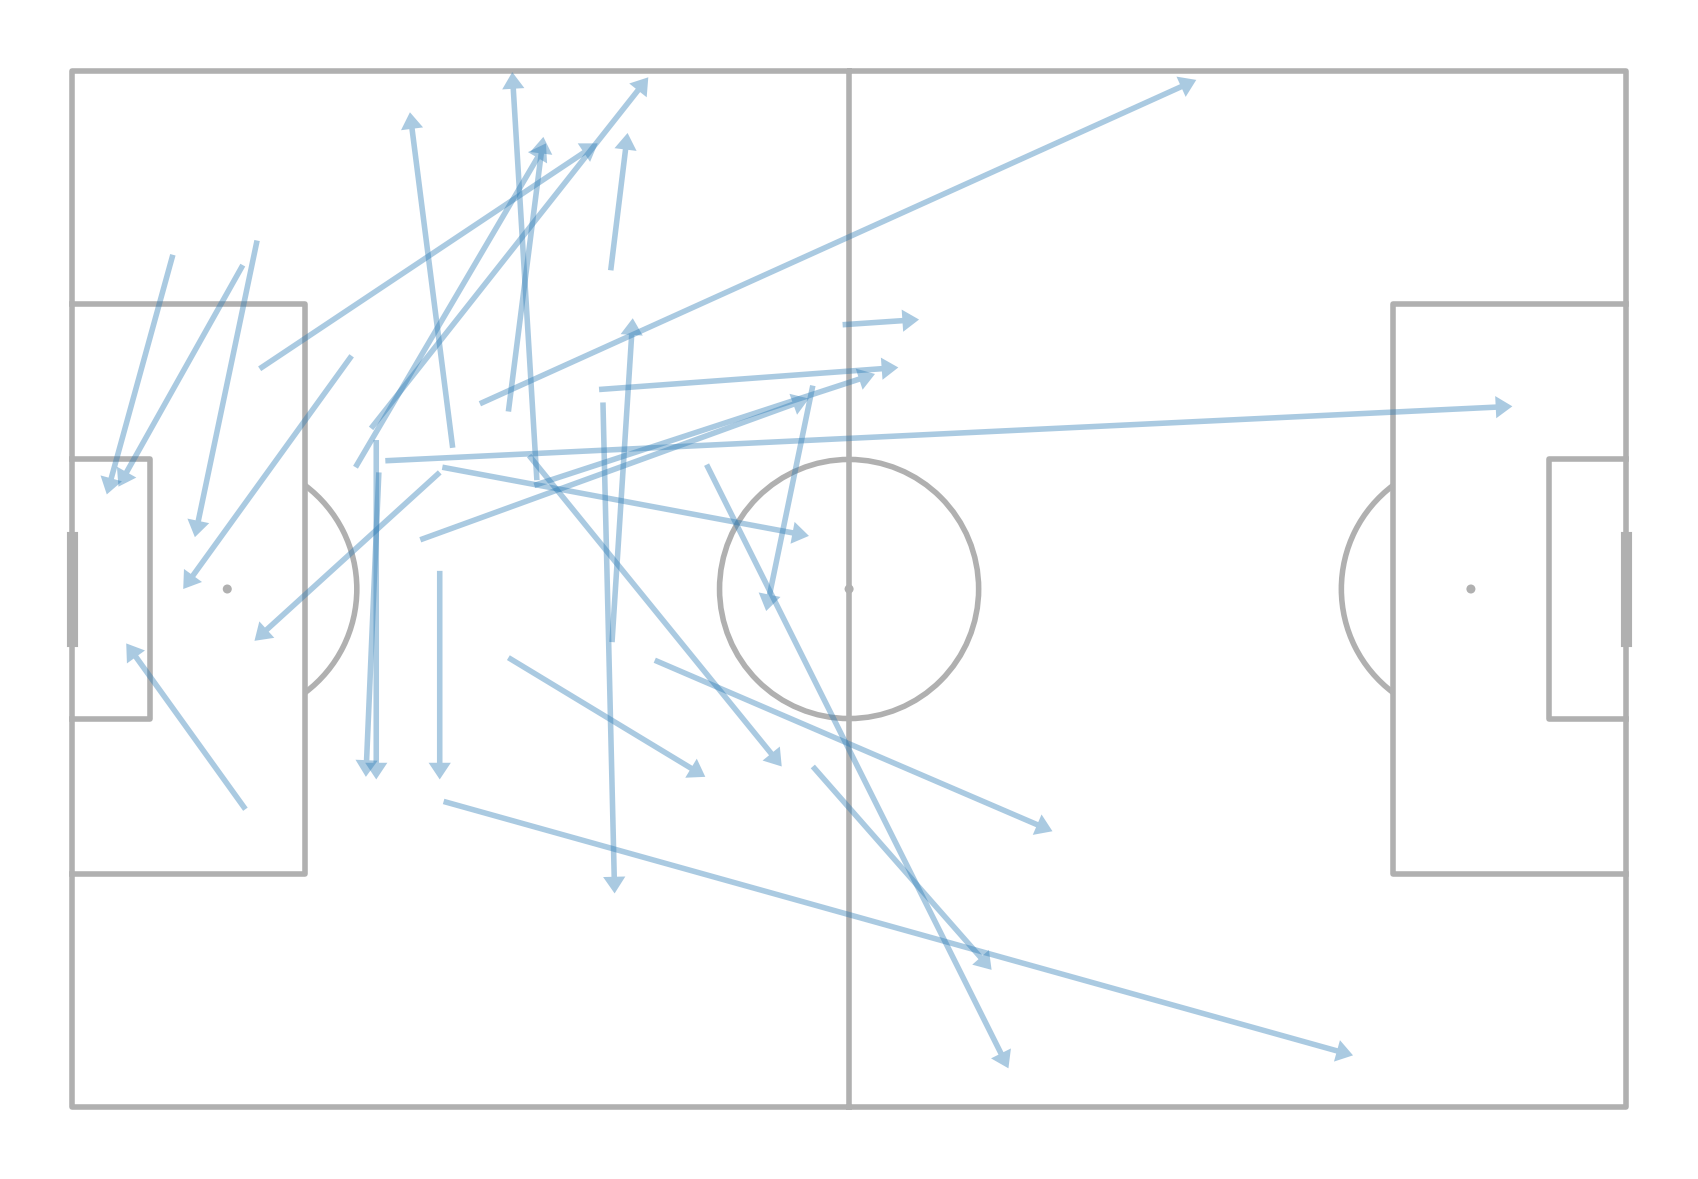

In [39]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))

p = pitch.arrows(x1, y1, x2, y2, alpha=0.4, color=blue,
                 headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax)

### Shot Chart

In [41]:
shots = events[(events['type'] == "Shot") &
               (events['team'] == "Liverpool")]

In [42]:
x, y = np.array(shots['location'].tolist()).T
xg = np.array(shots['shot_statsbomb_xg'].tolist())
goal = [red if g == "Goal" else 'black' for g in shots['shot_outcome'].to_list()]

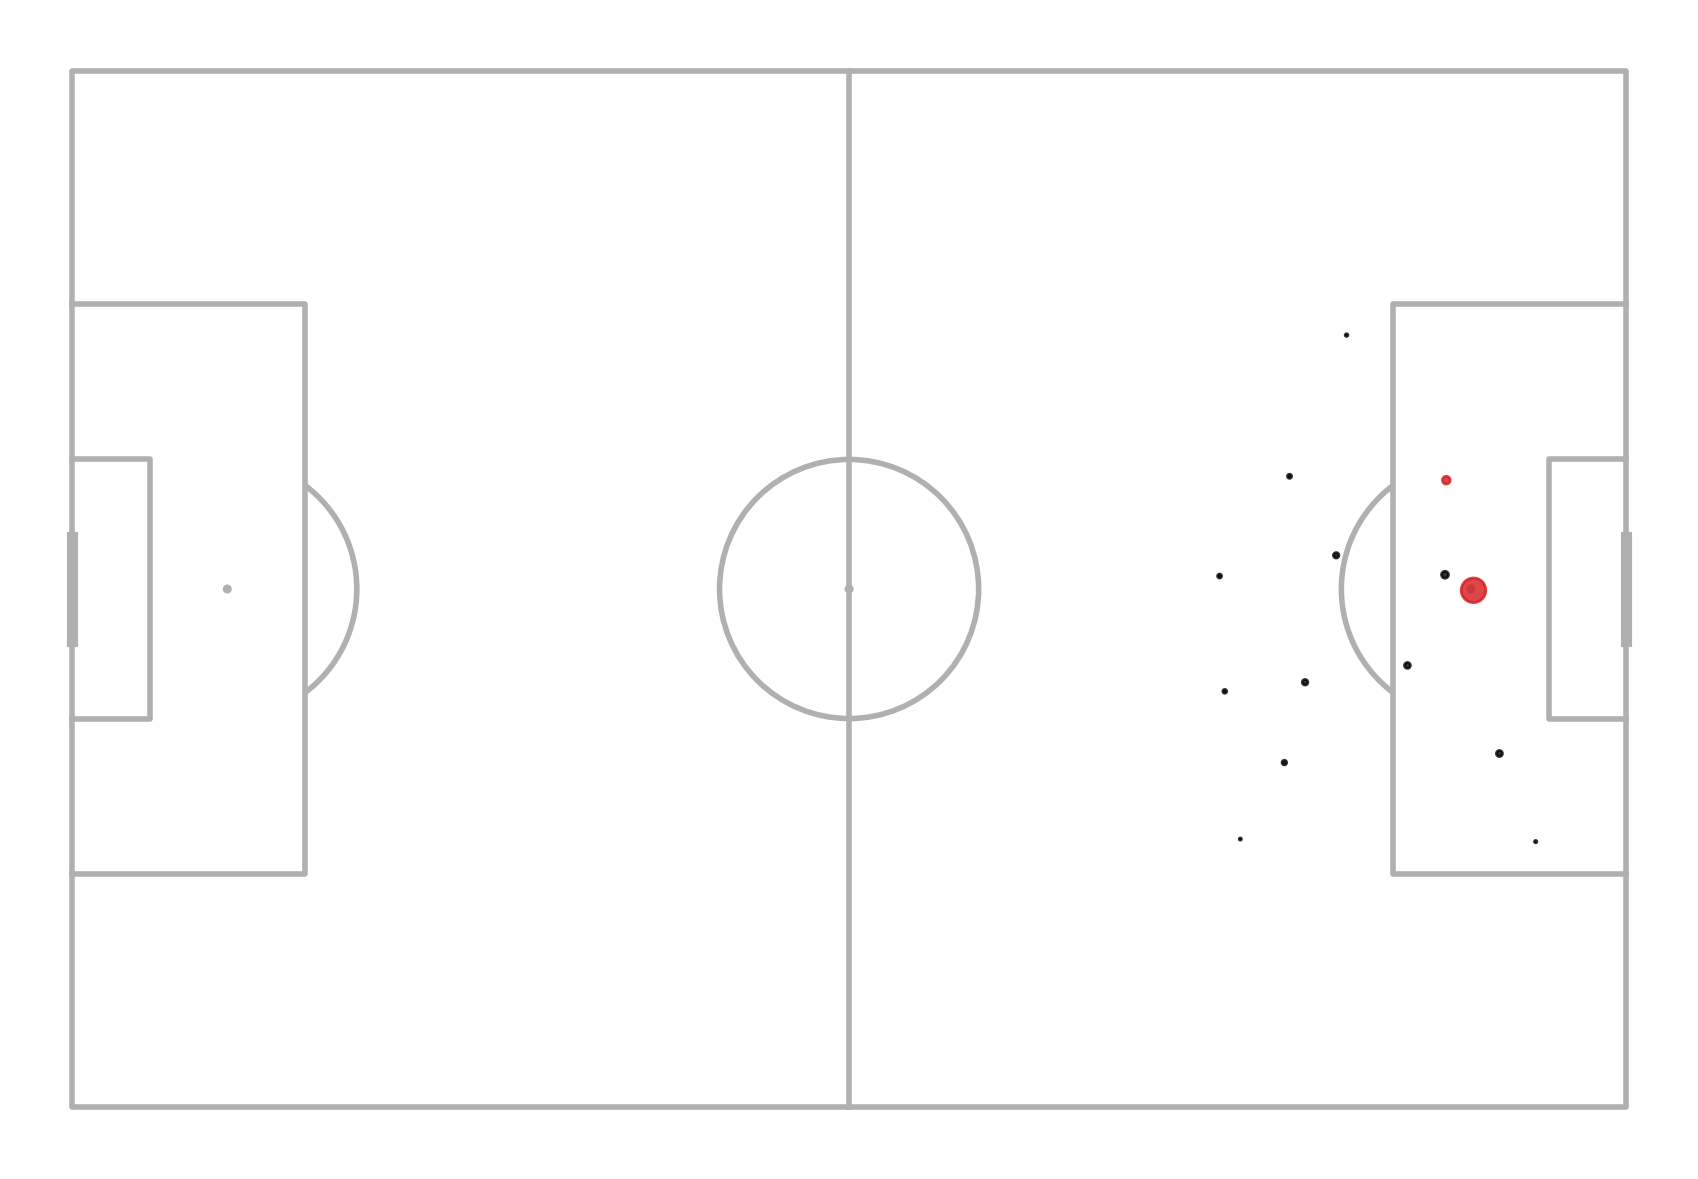

In [43]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.scatter(x, y, s=xg*100, c=goal, alpha=0.8, ax=ax)

### Heat Map (Event Data)

In [44]:
arg_events = events[~pd.isna(events['location']) &
                    (events['team'] == "Liverpool")]

In [45]:
x, y = np.array(arg_events['location'].tolist()).T

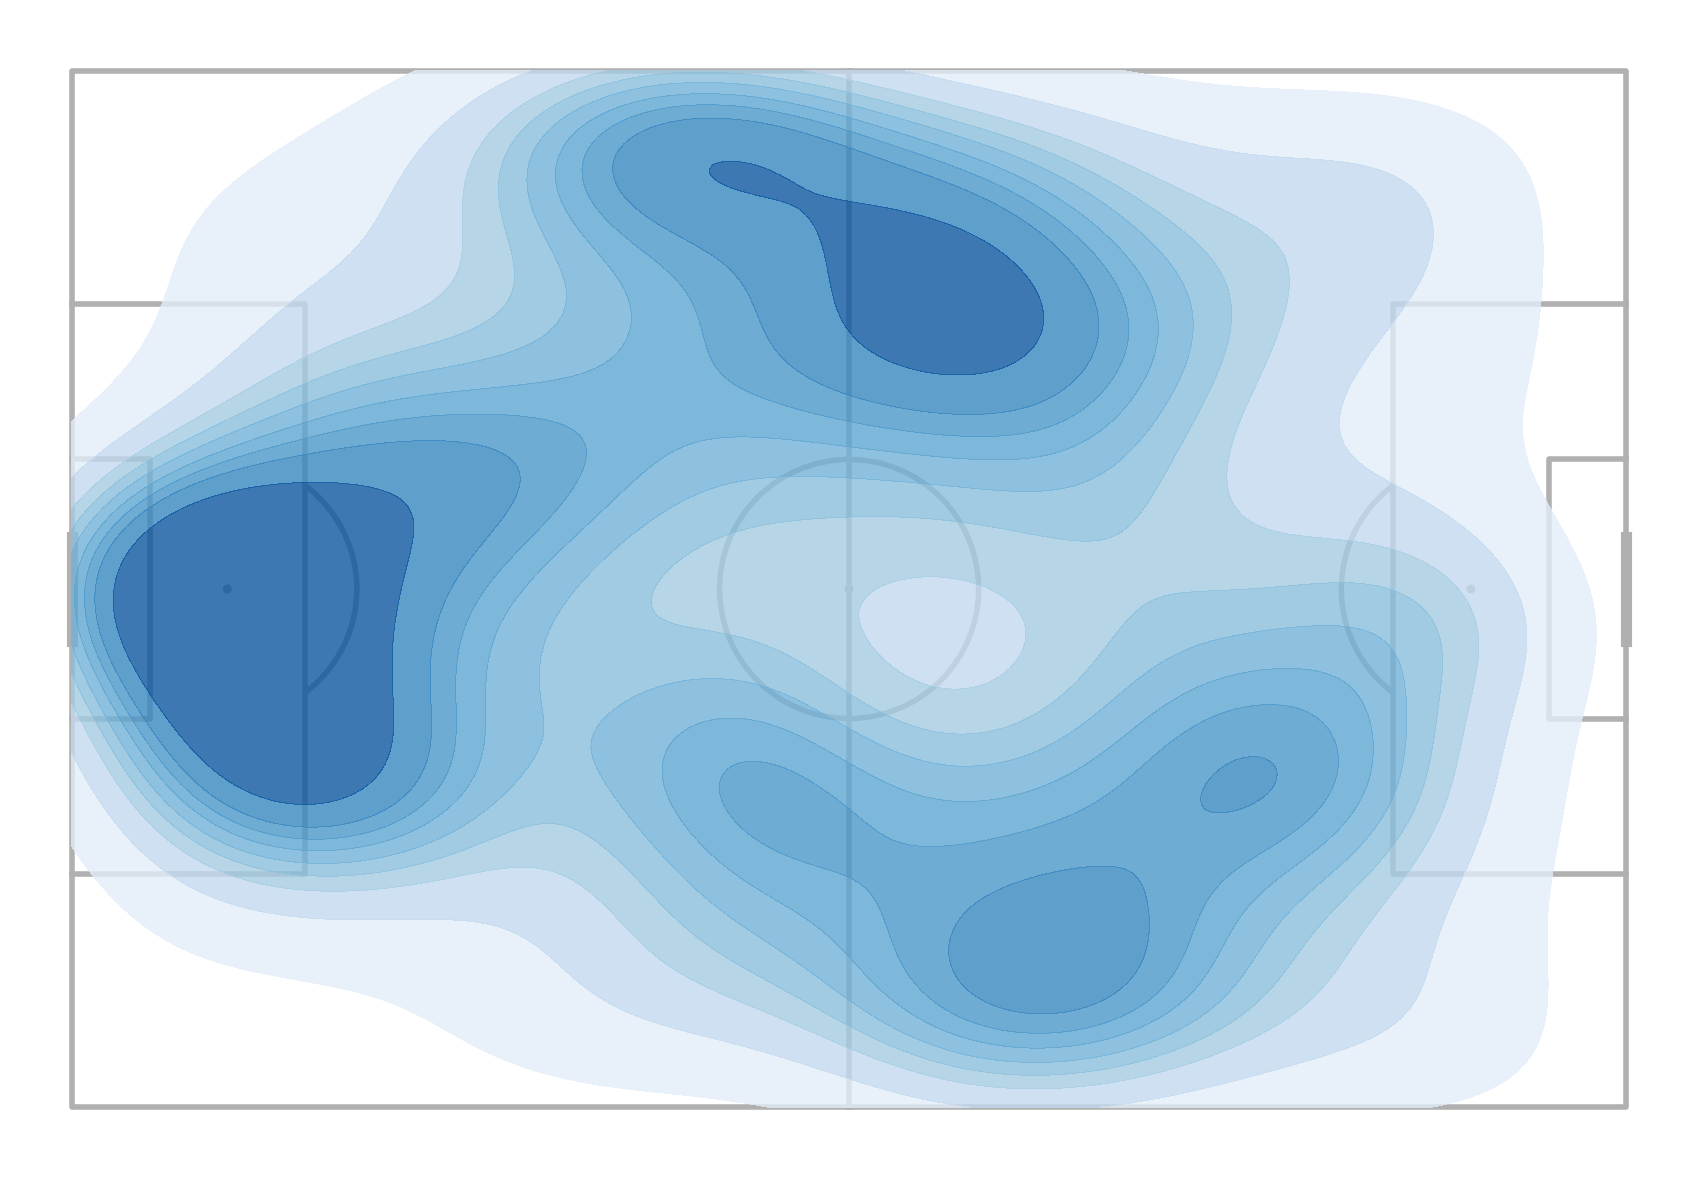

In [46]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
k = pitch.kdeplot(x, y, cmap='Blues', fill=True, levels=10, alpha=0.8, ax=ax)

## Clustering


In [47]:
matches_ = matches.to_dict(orient='records')

In [48]:
n_matches = 15

In [49]:
all_events = []
for m in tqdm(matches_[0:n_matches]):
    events = sb.events(match_id = m['match_id'])
    passes = events[(events['type'] == "Pass")]
    coordinates = passes[['location', 'pass_end_location']]
    x1, y1 = np.array(coordinates['location'].tolist()).T
    x2, y2 = np.array(coordinates['pass_end_location'].tolist()).T
    coords = np.vstack((x1, y1, x2, y2)).T
    all_events.extend(coords)

100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


In [50]:
df = pd.DataFrame(all_events, columns=['x1', 'y1', 'x2', 'y2'])
df.head(3)

,x1,y1,x2,y2
0,61.0,40.1,34.0,43.8
1,36.1,44.0,86.6,3.5
2,33.5,76.6,54.5,65.9


### K-Means

In [51]:
from sklearn.cluster import KMeans

In [52]:
model = KMeans(n_clusters=50)
features = df[['x1', 'y1', 'x2', 'y2']]
fit = model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


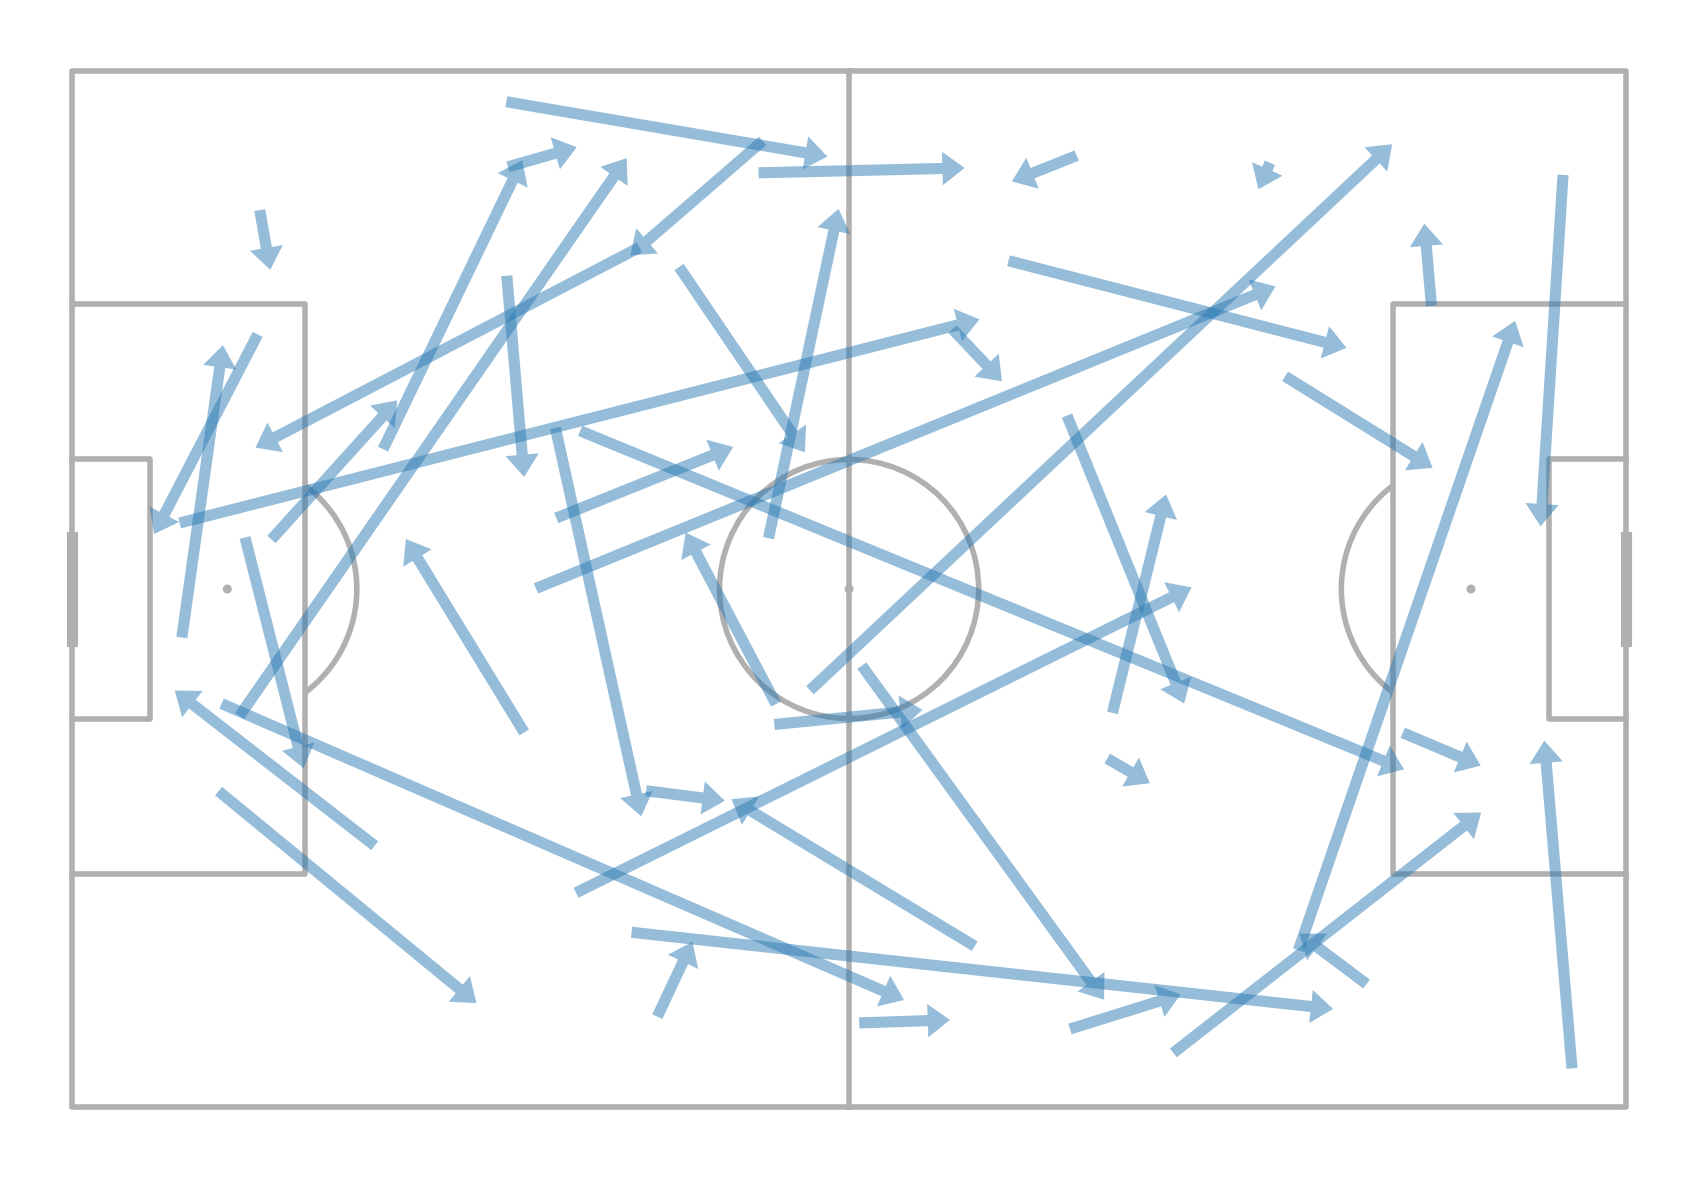

In [53]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
for coords in fit.cluster_centers_:
  p = pitch.arrows(*coords, alpha=0.5, color=blue, ax=ax,
                   headaxislength=2, headlength=2, headwidth=3, width=4)

### Gaussian Mixture Model



In [54]:
from sklearn.mixture import GaussianMixture

In [55]:
n_components = 40

In [56]:
gmm = GaussianMixture(n_components=n_components)
features = df[['x2', 'y2']]
fit = gmm.fit(features)

#### Plotting

In [57]:
from matplotlib.patches import Ellipse

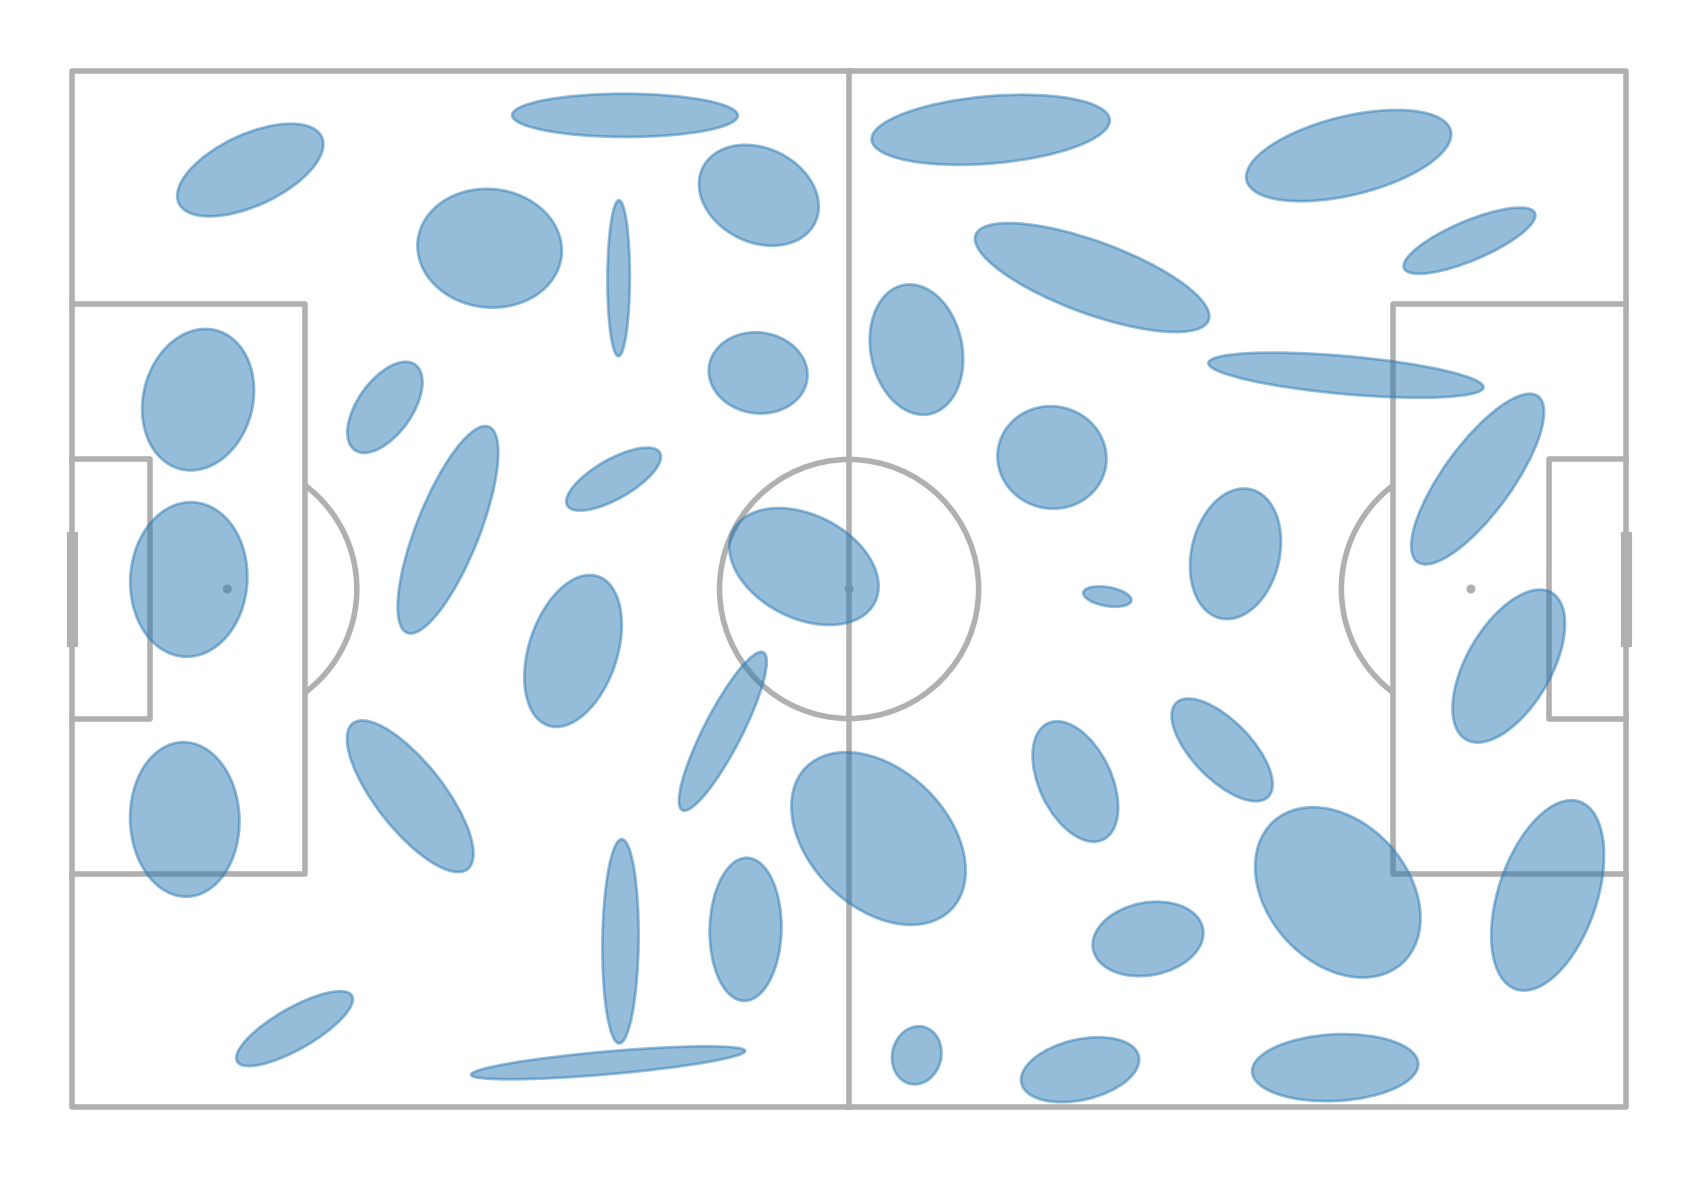

In [58]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
for i in range(gmm.n_components):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    eig_val, eig_vec = np.linalg.eig(cov)
    angle = np.arctan2(*eig_vec[:,0][::-1])
    e = Ellipse(mean,
                2*np.sqrt(eig_val[0]),
                2*np.sqrt(eig_val[1]),
                angle=np.degrees(angle),
                color=blue)
    e.set_alpha(0.5)
    ax.add_artist(e)

#### Resampling from GMM

In [59]:
samples = gmm.sample(5000)

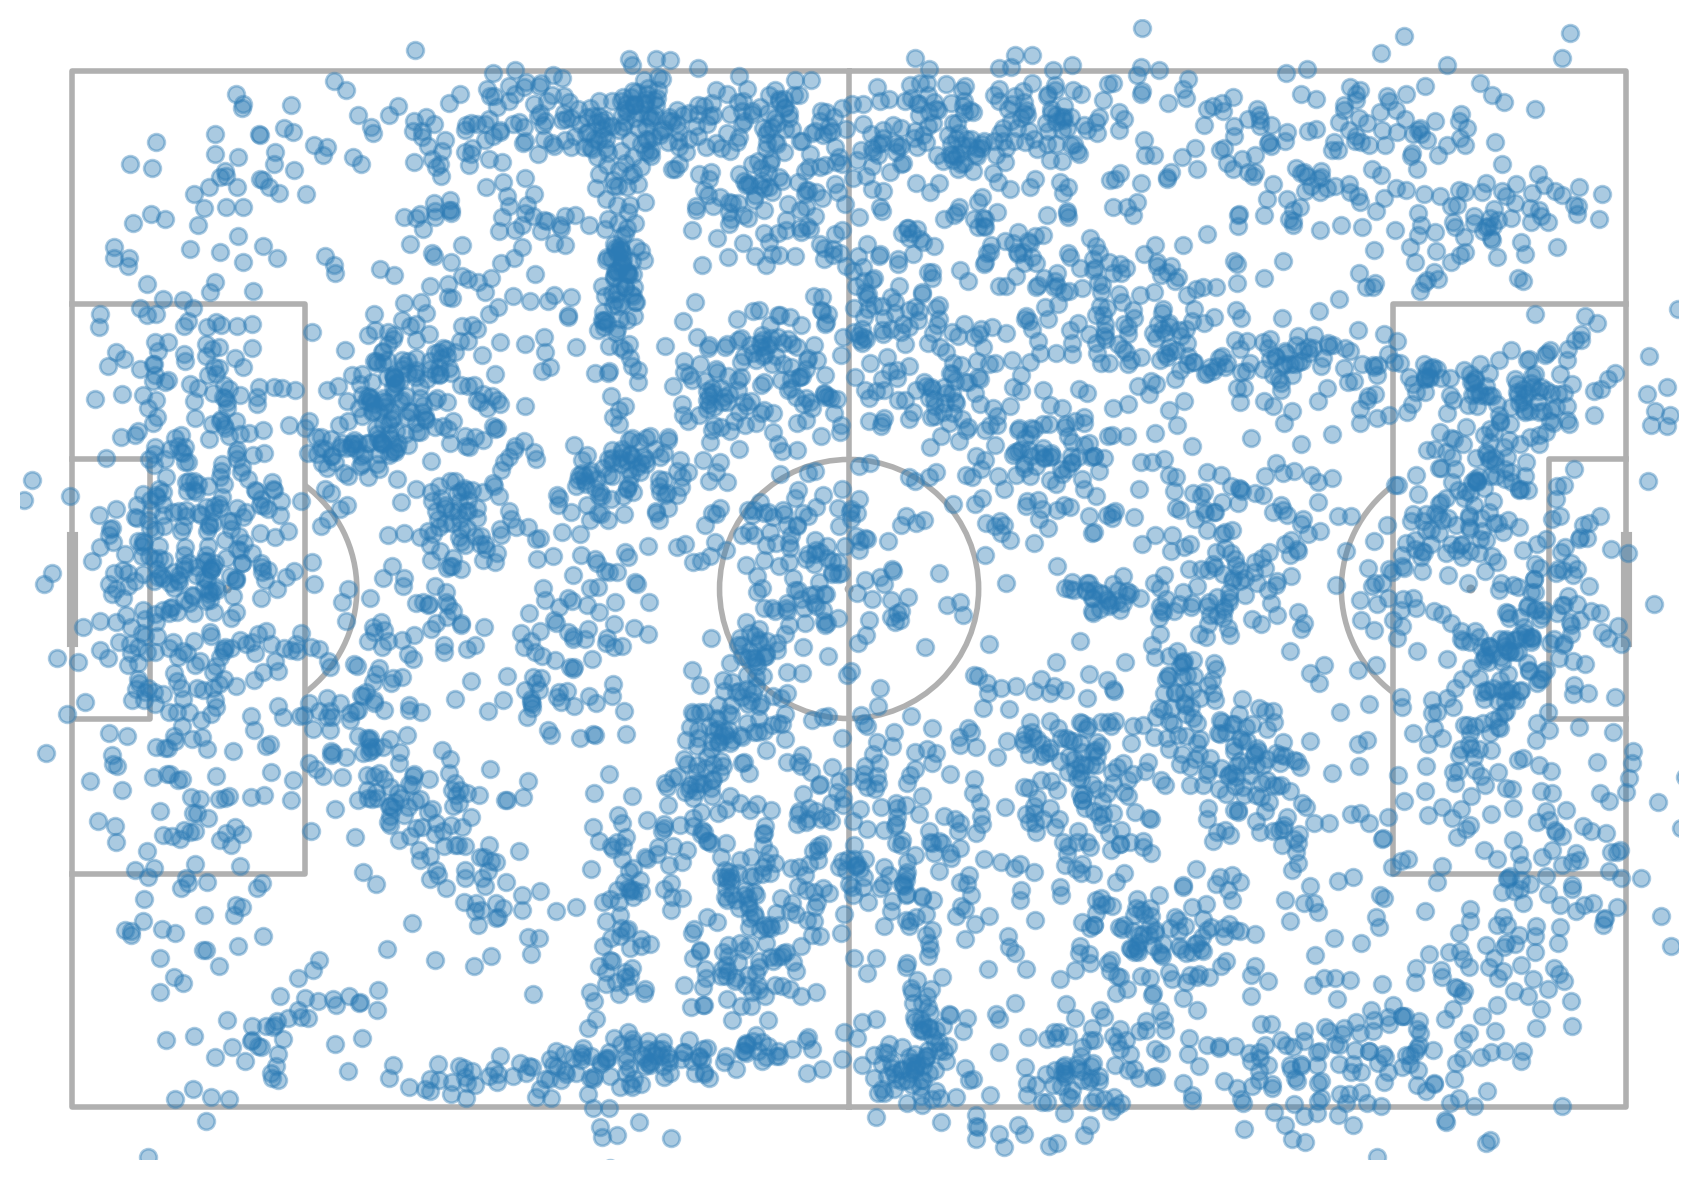

In [60]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
s = pitch.scatter(*samples[0].T, alpha=0.4, color=blue, ax=ax)

#### PDF Calculation



In [61]:
from scipy.stats import multivariate_normal

In [62]:
x_min, x_max = 0, 120
y_min, y_max = 0, 80
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 120),
                     np.linspace(y_min, y_max, 80))

Z = np.zeros((xx.shape[0], xx.shape[1], n_components))
for i, (mean,
        covariance,
        weight) in enumerate(zip(gmm.means_,
                                 gmm.covariances_,
                                 gmm.weights_)):

    Z[:,:,i] = weight * multivariate_normal.pdf(
      np.column_stack([xx.ravel(), yy.ravel()]).reshape(
          xx.shape + (2,)), mean=mean, cov=covariance)

Z = Z.sum(axis=-1)
Z = Z.reshape(xx.shape)

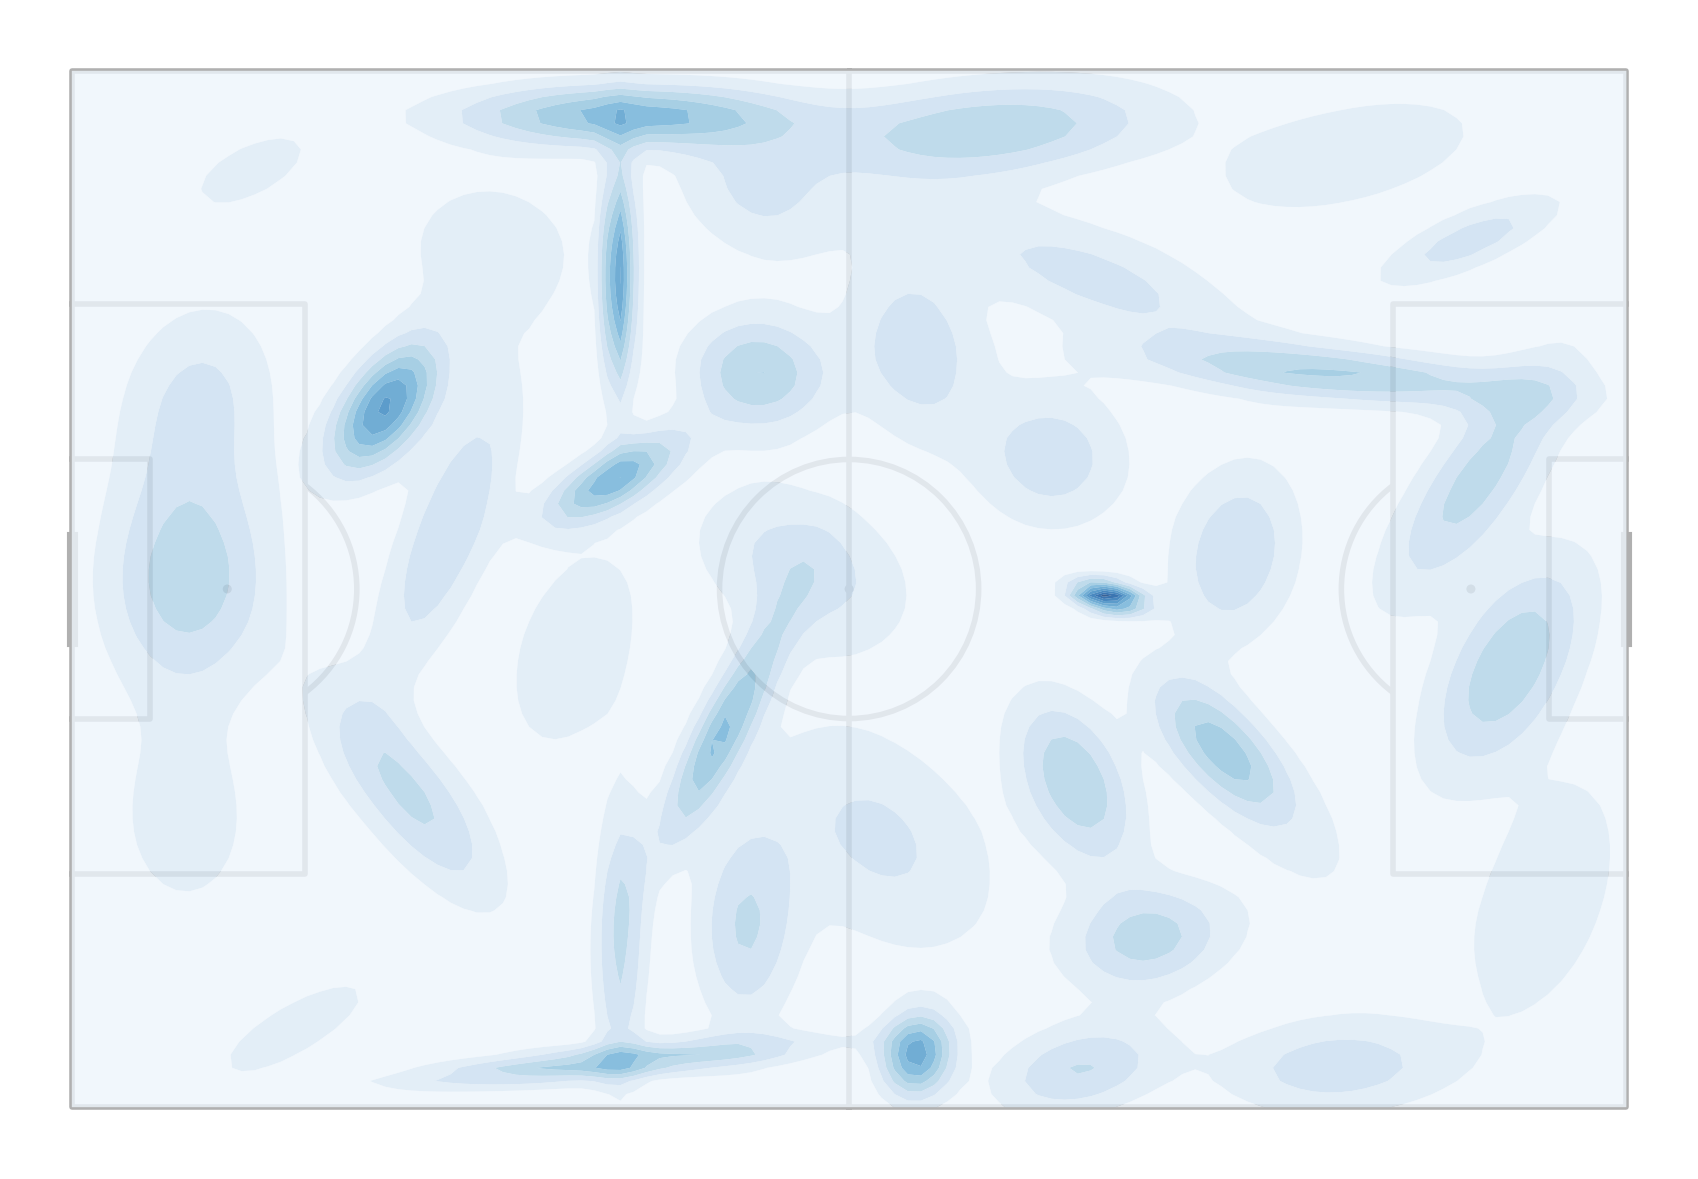

In [63]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
plot = ax.contourf(xx, yy, Z, levels=10,
                   cmap="Blues", alpha=0.8, antialiased=True)

## Model Pass Difficulty

In [64]:
all_events = []

for m in tqdm(matches_):
    events = sb.events(match_id = m['match_id'])
    passes = events[(events['type'] == "Pass")]
    x1, y1 = np.array(passes['location'].tolist()).T
    x2, y2 = np.array(passes['pass_end_location'].tolist()).T
    outcome = np.array(
        [1 if pd.isna(o) else 0 for o in passes['pass_outcome'].values]).T
    evs = np.vstack((x1, y1, x2, y2, outcome)).T
    all_events.extend(evs)

100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


In [65]:
df = pd.DataFrame(all_events, columns=['x1', 'y1', 'x2', 'y2', 'outcome'])

In [66]:
X = df[['x1', 'y1', 'x2', 'y2']]
y = df['outcome']

### Train/Test Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fit XGBoost Model

In [69]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=0)
fit = model.fit(X_train, y_train)

In [70]:
y_probs_train = model.predict_proba(X_train)[:, 1]
y_probs_test = model.predict_proba(X_test)[:, 1]

### Evaluate Model using ROC & AUC

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve

In [72]:
auc_train = roc_auc_score(y_train, y_probs_train)
auc_test = roc_auc_score(y_test, y_probs_test)

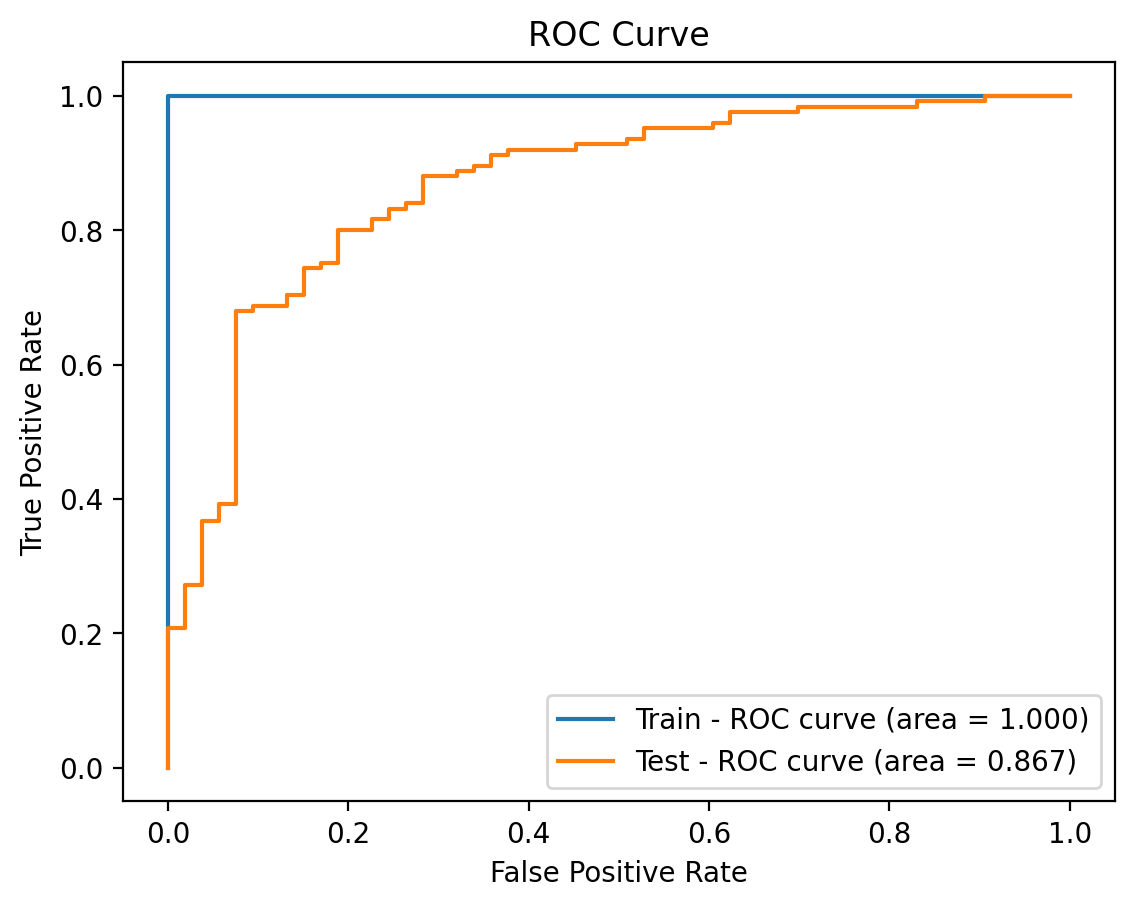

In [73]:
fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_probs_test)

plt.plot(fpr, tpr, label='Train - ROC curve (area = {:.3f})'.format(auc_train))
plt.plot(fpr_, tpr_, label='Test - ROC curve (area = {:.3f})'.format(auc_test))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

As expected, the model performs slightly better on the data set that it was trained on. But, the model performs quite well on the test data set too.

### Plot Examples

In [74]:
y_probs = model.predict_proba(df[['x1', 'y1', 'x2', 'y2']])[:, 1]
df['difficulty'] = y_probs

In [75]:
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm_r')

<ipython-input-75-772331b5559a>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm_r')


In [76]:
coords = df[['x1', 'y1', 'x2', 'y2']].values[100:200].T
colors = cmap(df['difficulty'].values[100:200])

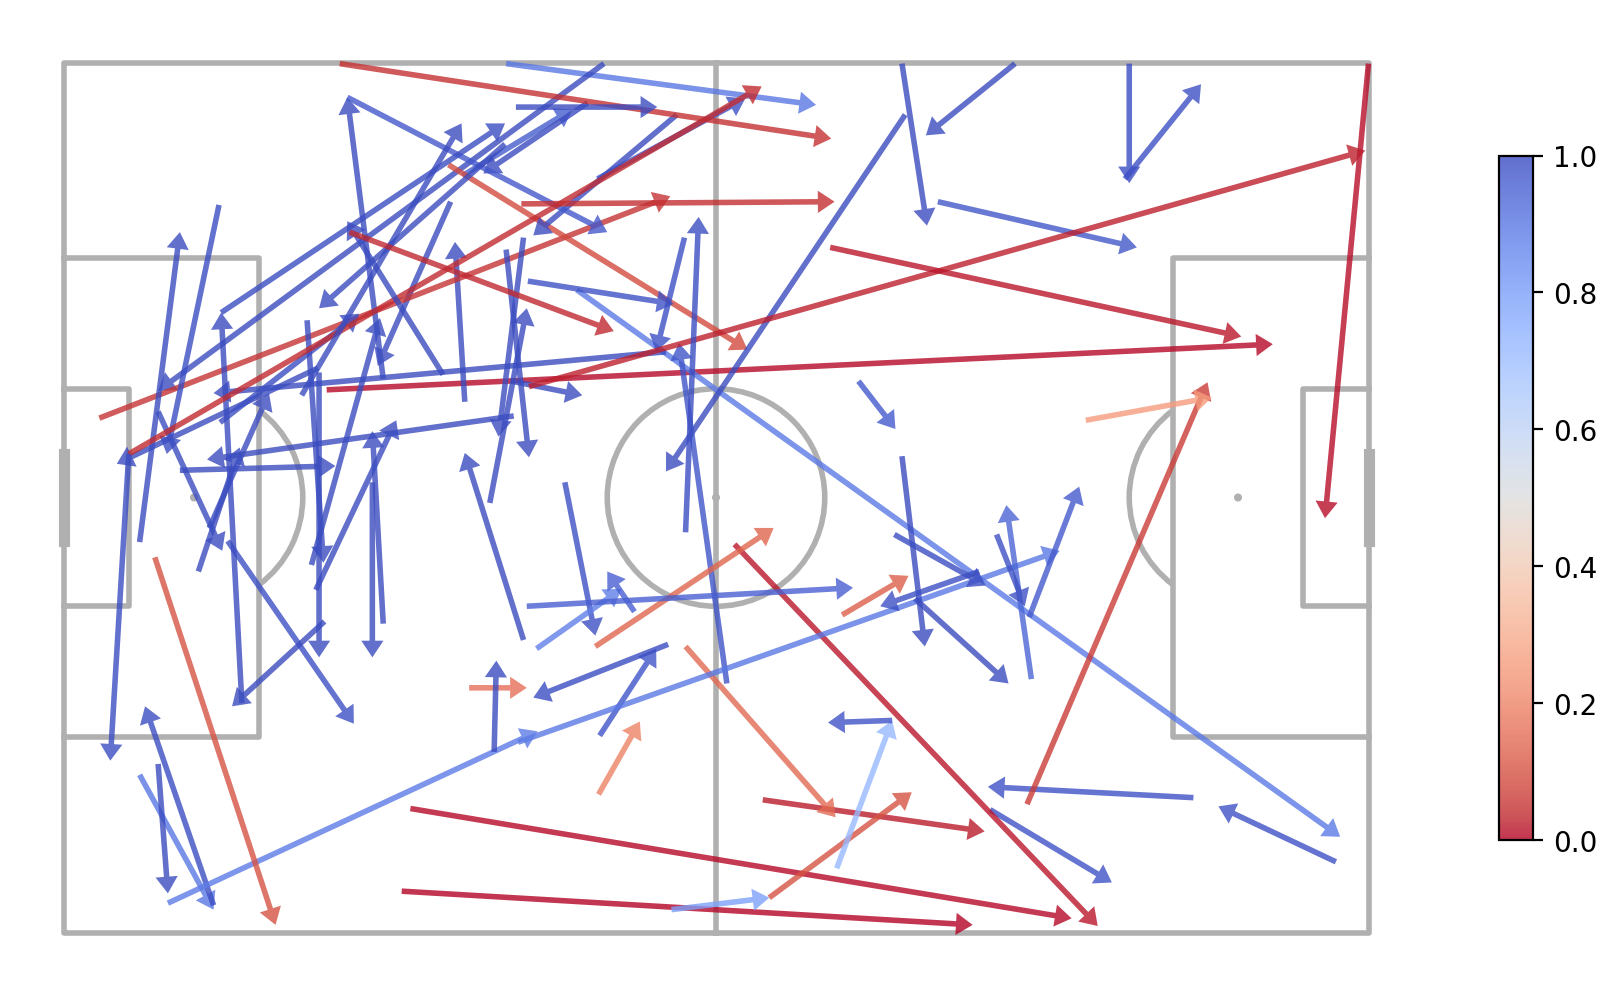

In [77]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.arrows(*coords, alpha=0.8, cmap='coolwarm_r', color=colors,
                  headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax)
plt.colorbar(p, shrink=0.6)

And we plot it as a filled contour, using a diverging color map.